In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

C:\Users\haris\AppData\Local\Temp\ipykernel_4336\1524422111.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='sulphates', data=df, palette='viridis')


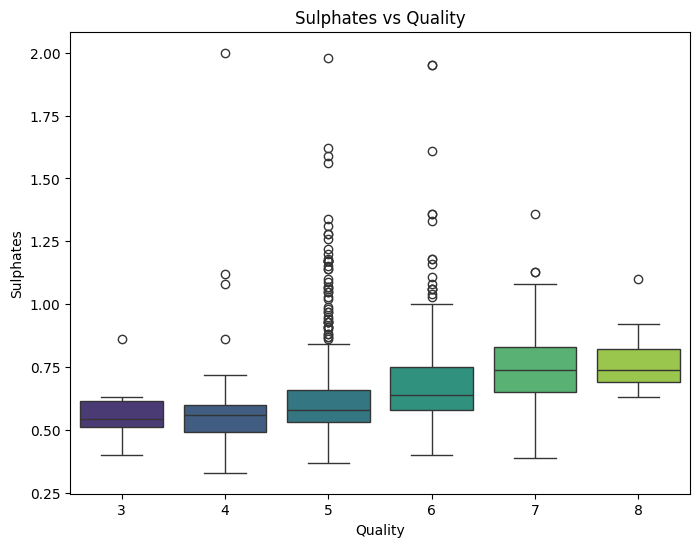

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.scatter(df.sulphates,df.quality)

plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='sulphates', data=df, palette='viridis')

# Adding labels
plt.title('Sulphates vs Quality')
plt.xlabel('Quality')
plt.ylabel('Sulphates')
plt.show()

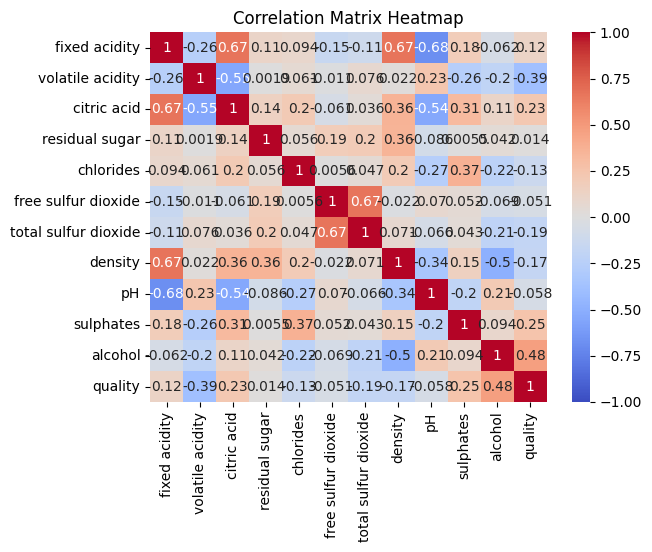

<Figure size 1000x800 with 0 Axes>

In [14]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1) 
plt.title('Correlation Matrix Heatmap')
plt.figure(figsize=(10, 8))
plt.show()

In [15]:
df.corr()["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

df = pd.read_csv('winequality-red.csv')


X = df.drop(['quality','residual sugar','pH','free sulfur dioxide'], axis=1)  # Dropping the target column (quality)
y = df['quality']  # Target column

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


log_reg = LogisticRegression(max_iter=1000) 
log_reg.fit(X_train, y_train)


predictions = log_reg.predict(X_test)
unique_classes = np.unique(y_test)

report = classification_report(
    y_test, predictions, 
    labels=unique_classes, 
    target_names=[str(i) for i in unique_classes]  
)

print("Classification Report with F1 Scores:")
print(report)


Classification Report with F1 Scores:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.77      0.69       130
           6       0.55      0.58      0.56       132
           7       0.35      0.19      0.25        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.25      0.26      0.25       320
weighted avg       0.53      0.57      0.55       320



c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report


df = pd.read_csv('winequality-red.csv')


X = df.drop('quality', axis=1) 
y = df['quality']  


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


cnn = Sequential()
cnn.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
cnn.add(Dense(units=64, activation='relu'))
cnn.add(Dense(units=1, activation='linear'))  # Regression, so linear activation


cnn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])


cnn.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))




Epoch 1/50


c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.8577 - mae: 3.3416 - val_loss: 2.1287 - val_mae: 1.1538
Epoch 2/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.8896 - mae: 1.0759 - val_loss: 1.3811 - val_mae: 0.9334
Epoch 3/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2290 - mae: 0.8565 - val_loss: 0.9992 - val_mae: 0.8103
Epoch 4/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9348 - mae: 0.7550 - val_loss: 0.7760 - val_mae: 0.7077
Epoch 5/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7968 - mae: 0.6982 - val_loss: 0.6686 - val_mae: 0.6611
Epoch 6/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5944 - mae: 0.5887 - val_loss: 0.5500 - val_mae: 0.6093
Epoch 7/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 0.5166 - mae: 0.5626 - val_loss: 0.5170 - val_mae: 0.5786
Epoch 8/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.4769 - mae: 0.5380 - val_loss: 0.4518 - val_mae: 0.5283
Epoch 9/50
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.

In [41]:
predictions = cnn.predict(X_test)


predictions = np.round(predictions).astype(int)


y_test = y_test.astype(int)


unique_classes = np.unique(y_test)

report = classification_report(
    y_test, predictions, 
    labels=unique_classes,  
    target_names=[str(i) for i in unique_classes] 
)

print("Classification Report with F1 Scores:")
print(report)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step
Classification Report with F1 Scores:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.20      0.22        10
           5       0.66      0.69      0.68       130
           6       0.56      0.61      0.58       132
           7       0.52      0.40      0.45        42
           8       0.00      0.00      0.00         5

    accuracy                           0.59       320
   macro avg       0.33      0.32      0.32       320
weighted avg       0.58      0.59      0.58       320



c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo